# Parte 2 - Experimentação

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Fabrizio Honda - 1715280006

> Autor: Dayvson Silva - 1915310007

## Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## O arquivo utilizado é o data0.txt
### Leitura do arquivo data0.txt com numpy

In [2]:
data0 = np.fromfile('../dados/data0.txt')
print(data0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


### Vendo o formato inicial do array

In [3]:
data0.shape

(1800,)

#### Sendo 1800 valores, significa que há 600 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [4]:
data0 = data0.reshape(600, 3)
print(data0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


## Algoritmo de treinamento do Perceptron

#### A fim de diminuir a repetição de código, o algoritmo do Perceptron de Rosenblatt foi reimplementado em formato de uma classe, a qual pode ser econtrada na pasta src.

In [5]:
import sys
sys.path.append('../')
from src.Perceptron import Perceptron

## Execuções das configurações

    Cada configuração é executada 100 vezes

### Configuração 1
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [6]:
learning_rate = 0.4
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)

    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)
    

c1e = epochs
c1a = adjustments
c1em = np.round(np.mean(epochs), 4)
c1esd = np.round(np.std(epochs), 4)
c1am = np.round(np.mean(adjustments), 4)
c1asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c1em, " Desvio Padrão: ", c1esd)
print("Ajustes. Média: ", c1am, " Desvio Padrão: ", c1asd)


	Iteração número  1

Quantidade total de épocas: 25
Quantidade total de ajustes: 365
Vetor final de pesos: [ 20.1803 -29.1098  66.4872]

	Iteração número  2

Quantidade total de épocas: 21
Quantidade total de ajustes: 367
Vetor final de pesos: [42.466  25.2139 63.9673]

	Iteração número  3

Quantidade total de épocas: 18
Quantidade total de ajustes: 191
Vetor final de pesos: [35.5587 20.8169 53.4747]

	Iteração número  4

Quantidade total de épocas: 7
Quantidade total de ajustes: 432
Vetor final de pesos: [3.855  2.1219 6.0699]

	Iteração número  5

Quantidade total de épocas: 9
Quantidade total de ajustes: 319
Vetor final de pesos: [ 0.7782 -0.3306  1.5119]

	Iteração número  6

Quantidade total de épocas: 3
Quantidade total de ajustes: 134
Vetor final de pesos: [14.5839 -3.7967 24.7426]

	Iteração número  7

Quantidade total de épocas: 14
Quantidade total de ajustes: 296
Vetor final de pesos: [26.934  15.7013 40.229 ]

	Iteração número  8

Quantidade total de épocas: 15
Quantidade t


Quantidade total de épocas: 7
Quantidade total de ajustes: 359
Vetor final de pesos: [ 1.2551 -1.6606  4.2282]

	Iteração número  64

Quantidade total de épocas: 12
Quantidade total de ajustes: 136
Vetor final de pesos: [  8.2342 -11.6785  26.9001]

	Iteração número  65

Quantidade total de épocas: 8
Quantidade total de ajustes: 180
Vetor final de pesos: [ 1.2703 -1.2212  3.7464]

	Iteração número  66

Quantidade total de épocas: 22
Quantidade total de ajustes: 50
Vetor final de pesos: [59.9638 35.6295 89.7421]

	Iteração número  67

Quantidade total de épocas: 19
Quantidade total de ajustes: 268
Vetor final de pesos: [37.4763 21.8454 55.9513]

	Iteração número  68

Quantidade total de épocas: 10
Quantidade total de ajustes: 594
Vetor final de pesos: [ 4.2952 -6.1988 14.176 ]

	Iteração número  69

Quantidade total de épocas: 16
Quantidade total de ajustes: 383
Vetor final de pesos: [27.9511 16.5107 41.8775]

	Iteração número  70

Quantidade total de épocas: 25
Quantidade total de aju

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [7]:
weights = perceptron.weights
weights

array([18.4343, 10.7783, 28.1389])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [8]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.6551 -(0.383)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

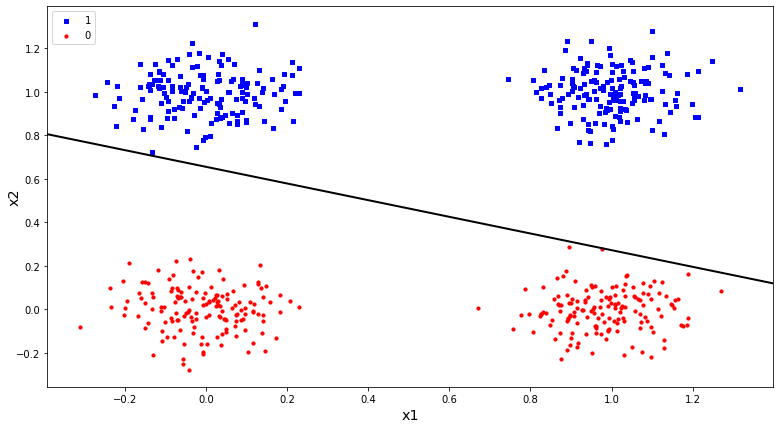

In [9]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 2
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [55]:
learning_rate = 0.4
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

c2e = epochs
c2a = adjustments
c2em = np.round(np.mean(epochs), 4)
c2esd = np.round(np.std(epochs), 4)
c2am = np.round(np.mean(adjustments), 4)
c2asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c2em, " Desvio Padrão: ", c2esd)
print("Ajustes. Média: ", c2am, " Desvio Padrão: ", c2asd)


	Iteração número  1

Quantidade total de épocas: 3
Quantidade total de ajustes: 5
Vetor final de pesos: [0.578  0.0554 0.8518]

	Iteração número  2

Quantidade total de épocas: 6
Quantidade total de ajustes: 12
Vetor final de pesos: [0.6044 0.1154 1.3285]

	Iteração número  3

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.5479 -0.127   0.9072]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [0.4665 0.1745 1.049 ]

	Iteração número  5

Quantidade total de épocas: 5
Quantidade total de ajustes: 5
Vetor final de pesos: [ 0.729  -0.0927  1.2778]

	Iteração número  6

Quantidade total de épocas: 4
Quantidade total de ajustes: 11
Vetor final de pesos: [ 0.3603 -0.1767  0.7391]

	Iteração número  7

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [ 0.3702 -0.2575  0.8371]

	Iteração número  8

Quantidade total de épocas: 4
Quantidade total de ajustes: 8
Vetor f


Quantidade total de épocas: 6
Quantidade total de ajustes: 10
Vetor final de pesos: [ 0.7984 -0.3362  1.6004]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 13
Vetor final de pesos: [ 0.3187 -0.1305  1.1432]

	Iteração número  70

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [ 0.3006 -0.1455  0.8169]

	Iteração número  71

Quantidade total de épocas: 6
Quantidade total de ajustes: 10
Vetor final de pesos: [0.4549 0.1379 1.0865]

	Iteração número  72

Quantidade total de épocas: 6
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.9256 -0.1952  1.49  ]

	Iteração número  73

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor final de pesos: [0.5335 0.0334 1.2607]

	Iteração número  74

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [0.5865 0.2956 1.0074]

	Iteração número  75

Quantidade total de épocas: 6
Quantidade total de ajustes: 12
Vetor final de peso

#### O seguinte vetor de pesos, obtido na última execução da configuração 2, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [56]:
weights = perceptron.weights
weights

array([0.4358, 0.1271, 0.9547])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [57]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.4565 -(0.1331)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

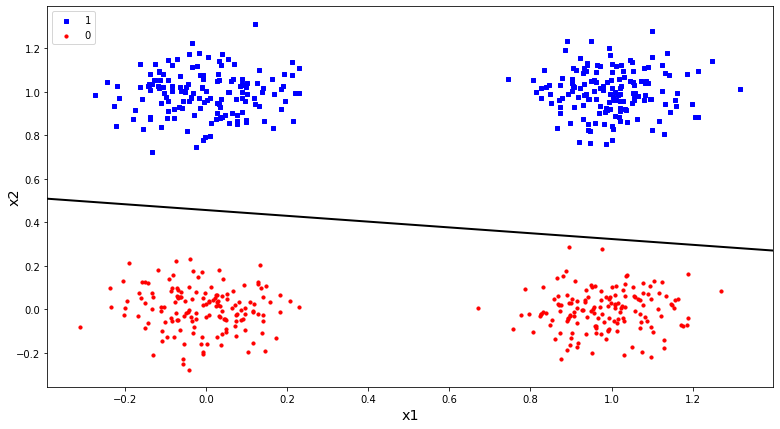

In [58]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 3
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [63]:
learning_rate = 0.4
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c3e = epochs
c3a = adjustments
c3em = np.round(np.mean(epochs), 4)
c3esd = np.round(np.std(epochs), 4)
c3am = np.round(np.mean(adjustments), 4)
c3asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c3em, " Desvio Padrão: ", c3esd)
print("Ajustes. Média: ", c3am, " Desvio Padrão: ", c3asd)


	Iteração número  1

Quantidade total de épocas: 8
Quantidade total de ajustes: 17
Vetor final de pesos: [ 0.998  -0.1303  1.5954]

	Iteração número  2

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [0.5685 0.1305 1.1777]

	Iteração número  3

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.3472 -0.1895  0.7412]

	Iteração número  4

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [0.2711 0.1191 0.5237]

	Iteração número  5

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.4675 -0.1817  0.8672]

	Iteração número  6

Quantidade total de épocas: 6
Quantidade total de ajustes: 10
Vetor final de pesos: [0.5136 0.1632 1.1849]

	Iteração número  7

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [0.4071 0.095  0.8177]

	Iteração número  8

Quantidade total de épocas: 5
Quantidade total de ajustes: 10
Vetor fin


Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.4014 -0.1279  0.7927]

	Iteração número  65

Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.4306 -0.0373  0.9289]

	Iteração número  66

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [0.4313 0.0553 0.9026]

	Iteração número  67

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [0.3136 0.004  0.7801]

	Iteração número  68

Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [0.3735 0.0786 0.9997]

	Iteração número  69

Quantidade total de épocas: 3
Quantidade total de ajustes: 3
Vetor final de pesos: [ 0.2608 -0.0294  0.6372]

	Iteração número  70

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [ 0.284  -0.1121  0.6226]

	Iteração número  71

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor final de pesos: [

#### O seguinte vetor de pesos, obtido na última execução da configuração 3, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [64]:
weights = perceptron.weights
weights

array([ 0.8451, -0.3146,  1.713 ])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [65]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.4933 -(-0.1837)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

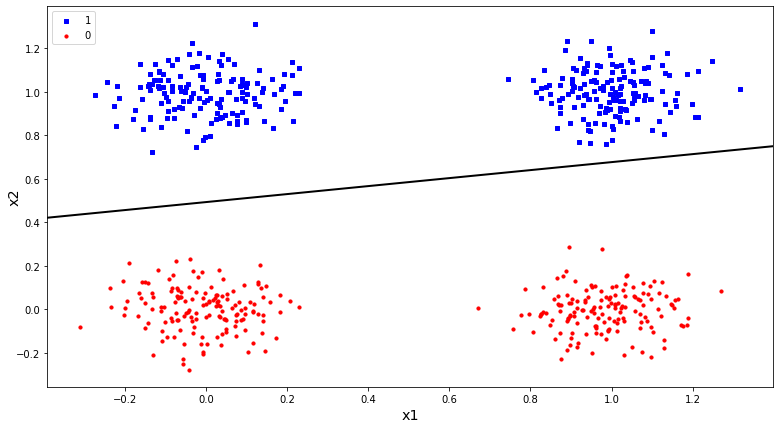

In [66]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 4
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [34]:
learning_rate = 0.1
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

    
c4e = epochs
c4a = adjustments
c4em = np.round(np.mean(epochs), 4)
c4esd = np.round(np.std(epochs), 4)
c4am = np.round(np.mean(adjustments), 4)
c4asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c4em, " Desvio Padrão: ", c4esd)
print("Ajustes. Média: ", c4am, " Desvio Padrão: ", c4asd)


	Iteração número  1

Quantidade total de épocas: 50
Quantidade total de ajustes: 831
Vetor final de pesos: [26.8048 15.918  40.0999]

	Iteração número  2

Quantidade total de épocas: 15
Quantidade total de ajustes: 525
Vetor final de pesos: [5.8392 3.4386 8.8612]

	Iteração número  3

Quantidade total de épocas: 20
Quantidade total de ajustes: 2046
Vetor final de pesos: [ 6.8912  3.9182 10.3002]

	Iteração número  4

Quantidade total de épocas: 97
Quantidade total de ajustes: 684
Vetor final de pesos: [54.7944 32.723  82.0963]

	Iteração número  5

Quantidade total de épocas: 55
Quantidade total de ajustes: 1733
Vetor final de pesos: [ 11.5412 -17.0386  38.2017]

	Iteração número  6

Quantidade total de épocas: 41
Quantidade total de ajustes: 1526
Vetor final de pesos: [20.0645 11.8525 30.0344]

	Iteração número  7

Quantidade total de épocas: 38
Quantidade total de ajustes: 1614
Vetor final de pesos: [  7.264  -10.6491  24.0279]

	Iteração número  8

Quantidade total de épocas: 43
Qu


Quantidade total de épocas: 57
Quantidade total de ajustes: 698
Vetor final de pesos: [30.228  17.949  45.3871]

	Iteração número  64

Quantidade total de épocas: 39
Quantidade total de ajustes: 756
Vetor final de pesos: [19.7613 11.6721 29.5612]

	Iteração número  65

Quantidade total de épocas: 21
Quantidade total de ajustes: 275
Vetor final de pesos: [34.9894  1.986  48.9401]

	Iteração número  66

Quantidade total de épocas: 82
Quantidade total de ajustes: 1243
Vetor final de pesos: [ 19.8566 -29.366   65.9651]

	Iteração número  67

Quantidade total de épocas: 14
Quantidade total de ajustes: 1697
Vetor final de pesos: [ 1.0443 -1.3089  3.2214]

	Iteração número  68

Quantidade total de épocas: 76
Quantidade total de ajustes: 1789
Vetor final de pesos: [39.9478 23.879  59.827 ]

	Iteração número  69

Quantidade total de épocas: 10
Quantidade total de ajustes: 342
Vetor final de pesos: [ 35.85   -11.3318  61.8571]

	Iteração número  70

Quantidade total de épocas: 23
Quantidade tot

#### O seguinte vetor de pesos, obtido na última execução da configuração 4, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [35]:
weights = perceptron.weights
weights

array([ 27.0433, -40.017 ,  89.8178])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [36]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3011 -(-0.4455)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

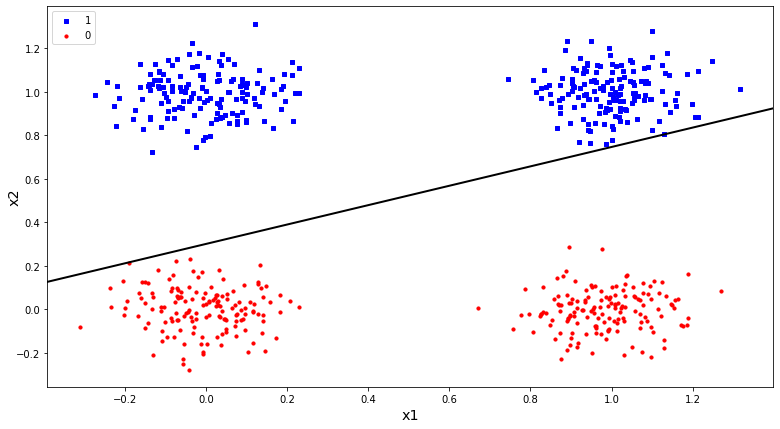

In [37]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 5
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [72]:
learning_rate = 0.1
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c5e = epochs
c5a = adjustments
c5em = np.round(np.mean(epochs), 4)
c5esd = np.round(np.std(epochs), 4)
c5am = np.round(np.mean(adjustments), 4)
c5asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c5em, " Desvio Padrão: ", c5esd)
print("Ajustes. Média: ", c5am, " Desvio Padrão: ", c5asd)


	Iteração número  1

Quantidade total de épocas: 6
Quantidade total de ajustes: 33
Vetor final de pesos: [ 0.1677 -0.1734  0.4978]

	Iteração número  2

Quantidade total de épocas: 3
Quantidade total de ajustes: 4
Vetor final de pesos: [0.3733 0.1725 0.5743]

	Iteração número  3

Quantidade total de épocas: 6
Quantidade total de ajustes: 18
Vetor final de pesos: [0.5054 0.185  0.9201]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.3229 -0.2087  0.8322]

	Iteração número  5

Quantidade total de épocas: 6
Quantidade total de ajustes: 31
Vetor final de pesos: [0.1256 0.0043 0.3574]

	Iteração número  6

Quantidade total de épocas: 5
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.195  -0.1769  0.5355]

	Iteração número  7

Quantidade total de épocas: 4
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.2784 -0.3448  0.9173]

	Iteração número  8

Quantidade total de épocas: 6
Quantidade total de ajustes: 17
Ve


Quantidade total de épocas: 3
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.3172 -0.0616  0.7712]

	Iteração número  68

Quantidade total de épocas: 4
Quantidade total de ajustes: 14
Vetor final de pesos: [ 0.1261 -0.0118  0.1892]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 39
Vetor final de pesos: [ 0.1365 -0.1243  0.4732]

	Iteração número  70

Quantidade total de épocas: 6
Quantidade total de ajustes: 22
Vetor final de pesos: [ 0.187  -0.0987  0.4421]

	Iteração número  71

Quantidade total de épocas: 6
Quantidade total de ajustes: 26
Vetor final de pesos: [0.1548 0.0323 0.3176]

	Iteração número  72

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [ 0.2701 -0.3087  0.9082]

	Iteração número  73

Quantidade total de épocas: 8
Quantidade total de ajustes: 13
Vetor final de pesos: [ 0.2479 -0.0444  0.4198]

	Iteração número  74

Quantidade total de épocas: 3
Quantidade total de ajustes: 4
Vetor final 

#### O seguinte vetor de pesos, obtido na última execução da configuração 5, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [73]:
weights = perceptron.weights
weights

array([ 0.2217, -0.0006,  0.3232])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [74]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.686 -(-0.0019)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

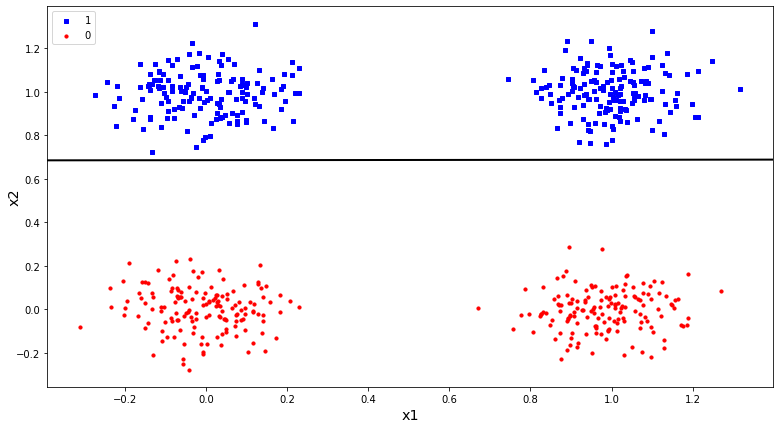

In [75]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 6
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [22]:
learning_rate = 0.1
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

    
c6e = epochs
c6a = adjustments
c6em = np.round(np.mean(epochs), 4)
c6esd = np.round(np.std(epochs), 4)
c6am = np.round(np.mean(adjustments), 4)
c6asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c6em, " Desvio Padrão: ", c6esd)
print("Ajustes. Média: ", c6am, " Desvio Padrão: ", c6asd)


	Iteração número  1

Quantidade total de épocas: 3
Quantidade total de ajustes: 1
Vetor final de pesos: [0.2273 0.0951 0.375 ]

	Iteração número  2

Quantidade total de épocas: 5
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.1013 -0.03    0.1736]

	Iteração número  3

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor final de pesos: [0.1275 0.0515 0.2747]

	Iteração número  4

Quantidade total de épocas: 6
Quantidade total de ajustes: 12
Vetor final de pesos: [0.1522 0.0416 0.2767]

	Iteração número  5

Quantidade total de épocas: 10
Quantidade total de ajustes: 23
Vetor final de pesos: [ 0.224  -0.0596  0.4197]

	Iteração número  6

Quantidade total de épocas: 4
Quantidade total de ajustes: 3
Vetor final de pesos: [0.2126 0.0305 0.3521]

	Iteração número  7

Quantidade total de épocas: 6
Quantidade total de ajustes: 14
Vetor final de pesos: [ 0.1669 -0.108   0.5116]

	Iteração número  8

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor f


Quantidade total de épocas: 3
Quantidade total de ajustes: 5
Vetor final de pesos: [0.2691 0.051  0.4145]

	Iteração número  67

Quantidade total de épocas: 5
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.164  -0.1009  0.401 ]

	Iteração número  68

Quantidade total de épocas: 4
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.0918 -0.0511  0.2043]

	Iteração número  69

Quantidade total de épocas: 3
Quantidade total de ajustes: 5
Vetor final de pesos: [ 0.1168 -0.0013  0.3584]

	Iteração número  70

Quantidade total de épocas: 4
Quantidade total de ajustes: 13
Vetor final de pesos: [0.2933 0.0968 0.4311]

	Iteração número  71

Quantidade total de épocas: 4
Quantidade total de ajustes: 8
Vetor final de pesos: [ 0.1575 -0.0141  0.2955]

	Iteração número  72

Quantidade total de épocas: 4
Quantidade total de ajustes: 10
Vetor final de pesos: [ 0.067  -0.0487  0.1632]

	Iteração número  73

Quantidade total de épocas: 4
Quantidade total de ajustes: 8
Vetor final de p

#### O seguinte vetor de pesos, obtido na última execução da configuração 6, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [23]:
weights = perceptron.weights
weights

array([ 0.0218, -0.0099,  0.0861])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [24]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.2532 -(-0.115)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

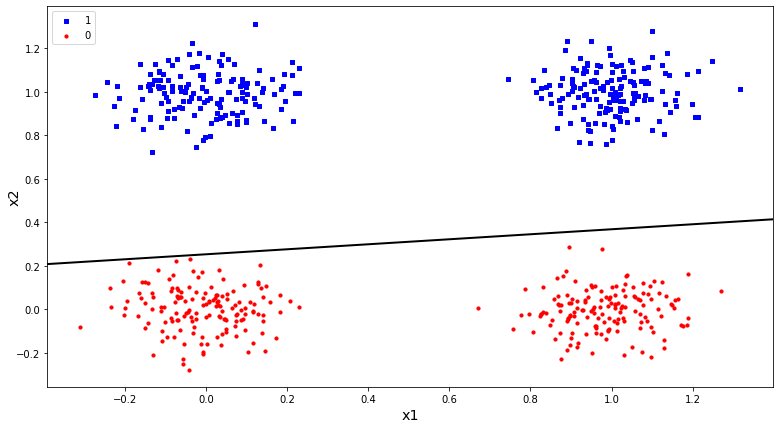

In [25]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 7
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [38]:
learning_rate = 0.01
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

    
c7e = epochs
c7a = adjustments
c7em = np.round(np.mean(epochs), 4)
c7esd = np.round(np.std(epochs), 4)
c7am = np.round(np.mean(adjustments), 4)
c7asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c7em, " Desvio Padrão: ", c7esd)
print("Ajustes. Média: ", c7am, " Desvio Padrão: ", c7asd)


	Iteração número  1

Quantidade total de épocas: 65
Quantidade total de ajustes: 15291
Vetor final de pesos: [ 0.7001 -1.0239  2.3112]

	Iteração número  2

Quantidade total de épocas: 417
Quantidade total de ajustes: 2474
Vetor final de pesos: [51.722  19.1155 75.1802]

	Iteração número  3

Quantidade total de épocas: 29
Quantidade total de ajustes: 1607
Vetor final de pesos: [11.1414 -7.6392 24.5426]

	Iteração número  4

Quantidade total de épocas: 49
Quantidade total de ajustes: 17510
Vetor final de pesos: [ 0.1382 -0.2005  0.4629]

	Iteração número  5

Quantidade total de épocas: 528
Quantidade total de ajustes: 14026
Vetor final de pesos: [28.3693 16.9654 42.4369]

	Iteração número  6

Quantidade total de épocas: 98
Quantidade total de ajustes: 25551
Vetor final de pesos: [ 0.9054 -1.3196  2.9887]

	Iteração número  7

Quantidade total de épocas: 457
Quantidade total de ajustes: 13421
Vetor final de pesos: [24.4651 14.6397 36.5884]

	Iteração número  8

Quantidade total de época


Quantidade total de épocas: 758
Quantidade total de ajustes: 5187
Vetor final de pesos: [44.0813 26.371  65.9228]

	Iteração número  62

Quantidade total de épocas: 846
Quantidade total de ajustes: 2467
Vetor final de pesos: [ 27.2689 -40.5439  90.6151]

	Iteração número  63

Quantidade total de épocas: 461
Quantidade total de ajustes: 30725
Vetor final de pesos: [  9.1566 -13.606   30.4193]

	Iteração número  64

Quantidade total de épocas: 41
Quantidade total de ajustes: 5609
Vetor final de pesos: [10.3202 -2.7339 17.1172]

	Iteração número  65

Quantidade total de épocas: 61
Quantidade total de ajustes: 6813
Vetor final de pesos: [ 0.9061 -1.3338  3.0079]

	Iteração número  66

Quantidade total de épocas: 79
Quantidade total de ajustes: 1147
Vetor final de pesos: [  7.1698 -10.6504  23.81  ]

	Iteração número  67

Quantidade total de épocas: 280
Quantidade total de ajustes: 11704
Vetor final de pesos: [21.8271 -9.2599 92.2235]

	Iteração número  68

Quantidade total de épocas: 427


#### O seguinte vetor de pesos, obtido na última execução da configuração 7, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [39]:
weights = perceptron.weights
weights

array([ 22.3083, -25.6818,  80.7977])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [40]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.2761 -(-0.3179)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

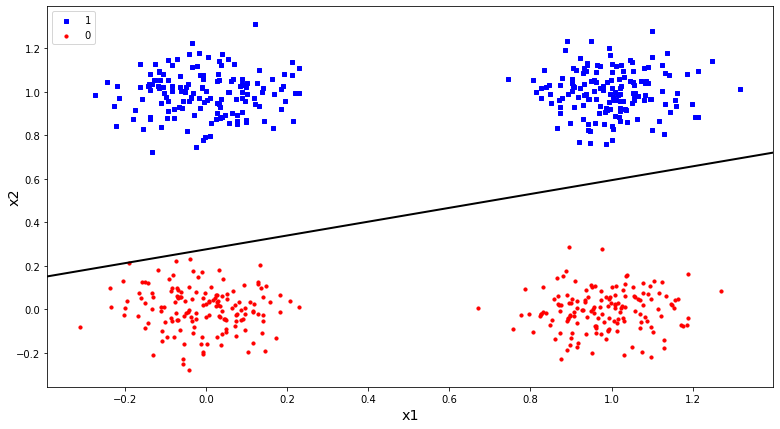

In [41]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 8
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [26]:
learning_rate = 0.01
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c8e = epochs
c8a = adjustments
c8em = np.round(np.mean(epochs), 4)
c8esd = np.round(np.std(epochs), 4)
c8am = np.round(np.mean(adjustments), 4)
c8asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c8em, " Desvio Padrão: ", c8esd)
print("Ajustes. Média: ", c8am, " Desvio Padrão: ", c8asd)


	Iteração número  1

Quantidade total de épocas: 14
Quantidade total de ajustes: 91
Vetor final de pesos: [ 0.2336 -0.3278  0.7576]

	Iteração número  2

Quantidade total de épocas: 8
Quantidade total de ajustes: 309
Vetor final de pesos: [ 0.0691 -0.0877  0.2144]

	Iteração número  3

Quantidade total de épocas: 2
Quantidade total de ajustes: 0
Vetor final de pesos: [0.607  0.0253 0.9835]

	Iteração número  4

Quantidade total de épocas: 6
Quantidade total de ajustes: 194
Vetor final de pesos: [0.0462 0.0077 0.0677]

	Iteração número  5

Quantidade total de épocas: 5
Quantidade total de ajustes: 110
Vetor final de pesos: [0.4408 0.1842 0.8873]

	Iteração número  6

Quantidade total de épocas: 11
Quantidade total de ajustes: 50
Vetor final de pesos: [ 0.2605 -0.3635  0.8502]

	Iteração número  7

Quantidade total de épocas: 7
Quantidade total de ajustes: 111
Vetor final de pesos: [ 0.0317 -0.0391  0.1011]

	Iteração número  8

Quantidade total de épocas: 11
Quantidade total de ajustes


Quantidade total de épocas: 7
Quantidade total de ajustes: 104
Vetor final de pesos: [0.1623 0.0904 0.2466]

	Iteração número  65

Quantidade total de épocas: 12
Quantidade total de ajustes: 143
Vetor final de pesos: [ 0.1791 -0.2523  0.5815]

	Iteração número  66

Quantidade total de épocas: 16
Quantidade total de ajustes: 94
Vetor final de pesos: [ 0.3234 -0.4635  1.0512]

	Iteração número  67

Quantidade total de épocas: 8
Quantidade total de ajustes: 182
Vetor final de pesos: [ 0.0251 -0.0218  0.0723]

	Iteração número  68

Quantidade total de épocas: 9
Quantidade total de ajustes: 69
Vetor final de pesos: [0.4246 0.2456 0.6374]

	Iteração número  69

Quantidade total de épocas: 8
Quantidade total de ajustes: 227
Vetor final de pesos: [ 0.0484 -0.0477  0.1334]

	Iteração número  70

Quantidade total de épocas: 11
Quantidade total de ajustes: 241
Vetor final de pesos: [ 0.1187 -0.1537  0.3787]

	Iteração número  71

Quantidade total de épocas: 10
Quantidade total de ajustes: 54
Vet

#### O seguinte vetor de pesos, obtido na última execução da configuração 8, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [27]:
weights = perceptron.weights
weights

array([0.2432, 0.127 , 0.3604])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [28]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.6748 -(0.3524)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

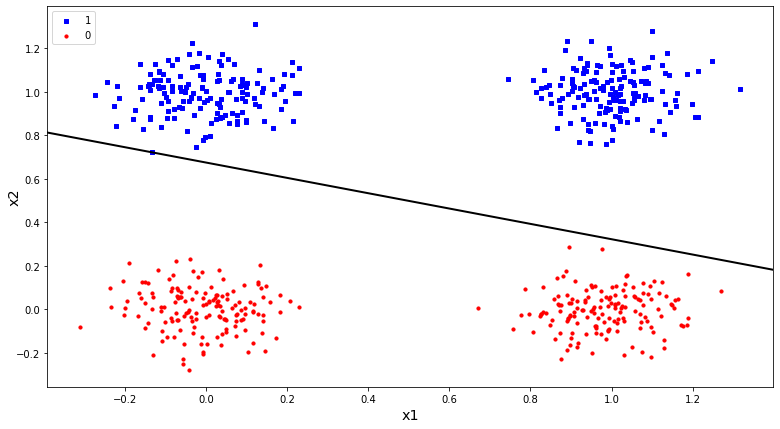

In [29]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 9
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [30]:
learning_rate = 0.01
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c9e = epochs
c9a = adjustments
c9em = np.round(np.mean(epochs), 4)
c9esd = np.round(np.std(epochs), 4)
c9am = np.round(np.mean(adjustments), 4)
c9asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c9em, " Desvio Padrão: ", c9esd)
print("Ajustes. Média: ", c9am, " Desvio Padrão: ", c9asd)


	Iteração número  1

Quantidade total de épocas: 8
Quantidade total de ajustes: 94
Vetor final de pesos: [ 0.073  -0.0976  0.252 ]

	Iteração número  2

Quantidade total de épocas: 6
Quantidade total de ajustes: 38
Vetor final de pesos: [ 0.0317 -0.0288  0.0875]

	Iteração número  3

Quantidade total de épocas: 4
Quantidade total de ajustes: 29
Vetor final de pesos: [0.1251 0.0644 0.1997]

	Iteração número  4

Quantidade total de épocas: 7
Quantidade total de ajustes: 88
Vetor final de pesos: [0.1753 0.0937 0.2731]

	Iteração número  5

Quantidade total de épocas: 6
Quantidade total de ajustes: 87
Vetor final de pesos: [0.073  0.0363 0.1182]

	Iteração número  6

Quantidade total de épocas: 3
Quantidade total de ajustes: 36
Vetor final de pesos: [ 0.1123 -0.0619  0.2332]

	Iteração número  7

Quantidade total de épocas: 4
Quantidade total de ajustes: 20
Vetor final de pesos: [ 0.0994 -0.113   0.3137]

	Iteração número  8

Quantidade total de épocas: 6
Quantidade total de ajustes: 41
V


Quantidade total de épocas: 3
Quantidade total de ajustes: 39
Vetor final de pesos: [ 0.0272 -0.0114  0.0746]

	Iteração número  65

Quantidade total de épocas: 8
Quantidade total de ajustes: 139
Vetor final de pesos: [ 0.0602 -0.0782  0.207 ]

	Iteração número  66

Quantidade total de épocas: 6
Quantidade total de ajustes: 59
Vetor final de pesos: [0.0549 0.0223 0.0894]

	Iteração número  67

Quantidade total de épocas: 7
Quantidade total de ajustes: 97
Vetor final de pesos: [ 0.0119 -0.0049  0.0367]

	Iteração número  68

Quantidade total de épocas: 5
Quantidade total de ajustes: 87
Vetor final de pesos: [0.0074 0.0013 0.0117]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 139
Vetor final de pesos: [0.0749 0.0389 0.1232]

	Iteração número  70

Quantidade total de épocas: 6
Quantidade total de ajustes: 50
Vetor final de pesos: [0.04   0.0125 0.072 ]

	Iteração número  71

Quantidade total de épocas: 7
Quantidade total de ajustes: 133
Vetor final de 

#### O seguinte vetor de pesos, obtido na última execução da configuração 9, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [31]:
weights = perceptron.weights
weights

array([0.0106, 0.0007, 0.0322])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [32]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3292 -(0.0217)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

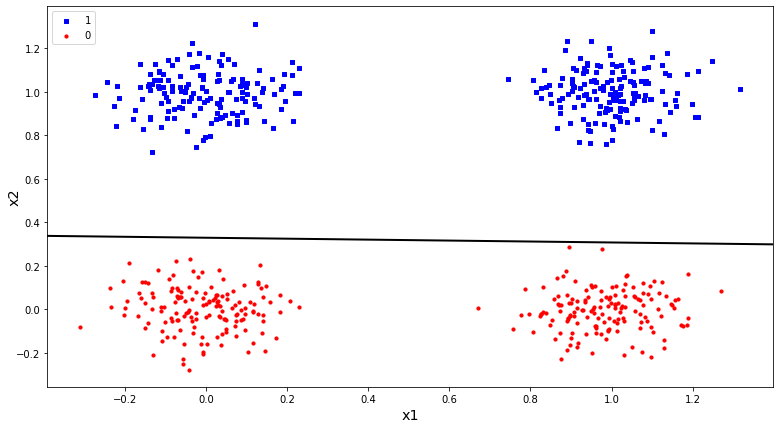

In [33]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

## Resultados e Observações

### Abaixo tem-se a relação com todas as configurações e os valores da taxa de apredizegem e do intervalo de pesos usado em cada uma

    Configuração 1
        > taxa de aprendizagem = 0.4
        > Intervalo uniforme de pesos = (-100.0, +100.0)
        
    Configuração 2
        > taxa de aprendizagem = 0.4
        > Intervalo uniforme de pesos = (-1.0, +1.0)
        
    Configuração 3
        > taxa de aprendizagem = 0.4
        > Intervalo uniforme de pesos = (-0.5, +0.5)
        
    Configuração 4
        > taxa de aprendizagem = 0.1
        > Intervalo uniforme de pesos = (-100.0, +100.0)
    
    Configuração 5
        > taxa de aprendizagem = 0.1
        > Intervalo uniforme de pesos = (-1.0, +1.0)
        
    Configuração 6
        > taxa de aprendizagem = 0.1
        > Intervalo uniforme de pesos = (-0.5, +0.5)
        
    Configuração 7
        > taxa de aprendizagem = 0.01
        > Intervalo uniforme de pesos = (-100.0, +100.0)
        
    Configuração 8
        > taxa de aprendizagem = 0.01
        > Intervalo uniforme de pesos = (-1.0, +1.0)
        
    Configuração 9
        > taxa de aprendizagem = 0.01
        > Intervalo uniforme de pesos = (-0.5, +0.5)

### As tabelas a seguir resumem o resultados obtidos a partir das execuções das cofigurações

#### Ordenando as configurações quanto à média de épocas em ordem decrescente

<div style="text-align: justify">A tabela abaixo demonstra os resultados obtidos com relação a média do número de épocas que cada configuração obteve em suas 100 execuções, a ordenação da tabela em ordem decrescente facilita a identificação das configurações que demandaram mais épocas para convergirem. 
</div>

<div style="text-align: justify">É nítido que as configurações cujo intervalo de peso era de (-100, +100) foram as que precisaram iterar mais vezes pelas entradas, sendo que para esse intervalo de pesos, a utilização de uma taxa de aprendizagem maior evidencia uma tendência de diminuição do esforço computacional.
</div>

<div style="text-align: justify">Com relação às demais configurações nota-se uma leve tendência de aumento do número de épocas com a taxa de aprendizado em 0.01. Já com relação ao uso de vetores de pesos com intervalo entre (-1, +1) e (-0.5,+0.5), não há uma clara diferença de performance.
</div> 

In [76]:
import pandas as pd

epochs_table = {'Configuração' :['1','2','3','4','5','6','7','8','9'],
                'Taxa de Aprendizado': ['0.4', '0.4', '0.4', '0.1', '0.1', '0.1', '0.01', '0.01', '0.01'],
                'Intervalo de Pesos':['(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',],
                'Média de Épocas': [c1em, c2em, c3em, c4em, c5em, c6em, c7em, c8em, c9em],
                'Desvio Padrão': [c1esd, c2esd, c3esd, c4esd, c5esd, c6esd, c7esd, c8esd, c9esd]}

epochs_table = pd.DataFrame(epochs_table)
epochs_table.set_index('Configuração', inplace=True)
epochs_table.sort_values(by='Média de Épocas', ascending=False)

,Taxa de Aprendizado,Intervalo de Pesos,Média de Épocas,Desvio Padrão
Configuração,,,,
7,0.01,"(-100.0, +100.0)",397.99,346.7564
4,0.1,"(-100.0, +100.0)",33.20,26.3105
1,0.4,"(-100.0, +100.0)",13.15,7.2421
8,0.01,"(-1.0, +1.0)",7.88,3.1410
9,0.01,"(-0.5, +0.5)",6.22,1.8525
5,0.1,"(-1.0, +1.0)",4.99,1.2206
6,0.1,"(-0.5, +0.5)",4.94,1.1209
3,0.4,"(-0.5, +0.5)",4.84,1.3017
2,0.4,"(-1.0, +1.0)",4.73,1.1389


#### Ordenando as configurações quanto à média de ajustes em ordem decrescente

<div style="text-align: justify">A tabela abaixo demonstra os resultados obtidos com relação a média do número de ajustes que cada configuração obteve em suas 100 execuções, a ordenação da tabela em ordem decrescente facilita a identificação das configurações que demandaram mais ajustes para convergirem.
</div>

<div style="text-align: justify">Mais uma vez é nítido que quando utilizado o intervalo de pesos (-100, +100) o gasto computacional é maior. O resultado desta tabela é bastante semelhante à anterior, algo esperado visto que há uma tendência de que um maior número de épocas leve também a um maior número de ajustes.
</div>

<div style="text-align: justify"> Apesar do resultado semelhante, a tabela de ajustes permite diferenciar melhor as configurações, por exemplo, pela média de ajustes podemos ver o quanto a performance é diminuída conforme a taxa de aprendizagem diminui. Isso é útil para comparar as configurações que usam o intervalo de pesos (-1, +1) e (-0.5, +0.5), mesmo que na tabela acima elas pareciam equivalentes, na tabela abaixo, nota-se uma disparidade  entre as configurações 8 e 9 com as restantes. A baixa taxa de aprendizado das configurações 8 e 9 fez elas precisarem de mais ajustes para a convergência. Em particular, a configuração 8 precisou de uma média do dobro do número de ajustes do que a configuração 9.
</div>

In [77]:
import pandas as pd

adjusts_table = {'Configuração' :['1','2','3','4','5','6','7','8','9'],
                'Taxa de Aprendizado': ['0.4', '0.4', '0.4', '0.1', '0.1', '0.1', '0.01', '0.01', '0.01'],
                'Intervalo de Pesos':['(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',],
                'Média de Ajustes': [c1am, c2am, c3am, c4am, c5am, c6am, c7am, c8am, c9am],
                'Desvio Padrão': [c1asd, c2asd, c3asd, c4asd, c5asd, c6asd, c7asd, c8asd, c9asd]}

adjusts_table = pd.DataFrame(adjusts_table)
adjusts_table.set_index('Configuração', inplace=True)
adjusts_table.sort_values(by='Média de Ajustes', ascending=False)

,Taxa de Aprendizado,Intervalo de Pesos,Média de Ajustes,Desvio Padrão
Configuração,,,,
7,0.01,"(-100.0, +100.0)",11527.65,7302.9421
4,0.1,"(-100.0, +100.0)",1094.04,689.9828
1,0.4,"(-100.0, +100.0)",261.25,160.6618
8,0.01,"(-1.0, +1.0)",117.11,72.4611
9,0.01,"(-0.5, +0.5)",64.89,37.6829
5,0.1,"(-1.0, +1.0)",16.46,9.7061
6,0.1,"(-0.5, +0.5)",10.69,4.9289
2,0.4,"(-1.0, +1.0)",7.86,3.6906
3,0.4,"(-0.5, +0.5)",7.24,3.2253


### Os gráficos a seguir ajudam a visualizar os resultados 

<div style="text-align: justify">Os gráficos de boxplot para as épocas e os ajustes oferecem uma visualização dos resutados entre as diferentes configurações, vemos que a configuração 7, é notoriamente a de pior performance, essa configuração utiliza a menor taxa de aprendizagem com a maior amplitude dos pesos. Nota-se um grande ganho de performance aumentando de 0.01 para 0.1 a taxa de aprendizagem, sendo essa justamente a configuração 4, mas ainda assim, com um custo computacional muito maior do que as demais configurações. A diferença é tão grande que o boxplot das demais configurações quase nem aparece no gráfico dimensionado para mostrar a configuração 7.
</div>

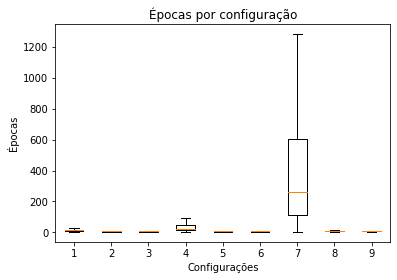

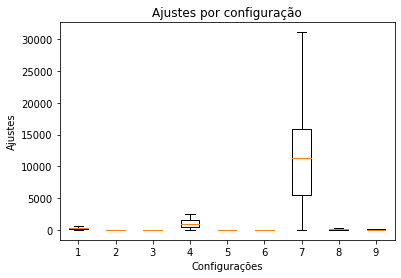

In [78]:
#Boxplot para as épocas
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.boxplot([c1e, c2e, c3e, c4e, c5e, c6e, c7e, c8e, c9e], showfliers=False)

ax1.set_title('Épocas por configuração')
ax1.set_xlabel('Configurações')
ax1.set_ylabel('Épocas')
plt.show()

#Boxplot para os ajustes
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.boxplot([c1a, c2a, c3a, c4a, c5a, c6a, c7a, c8a, c9a], showfliers=False)

ax2.set_title('Ajustes por configuração')
ax2.set_xlabel('Configurações')
ax2.set_ylabel('Ajustes')

plt.show()

#### Bloxplot sem as configurações 4 e 7

<div style="text-align: justify">A fim de se observar melhor o comportamento das demais configurações, as configurações 4 e 7 foram removidas, assim pode se observar que as configurações 1, 8 e 9, parecem apresentar um pior desempenho dentre as que sobraram. A configuração 1 utiliza o intervalo de peso entre (-100, +100), porém uma taxa de aprendizagem de 0.4, o que explica sua melhor performance em relação às configurações 4 e 7. Ambas as configurações 8 e 9, utilizam a baixa taxa de aprendizagem de 0.01, e apesar do intervalo de pesos menor, a utilização de uma taxa de aprendizagem tão baixa, teve forte contribuição no menor desempenho com relação às configurações 2, 3 ,5 e 6.
</div>

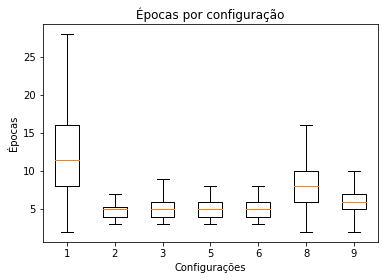

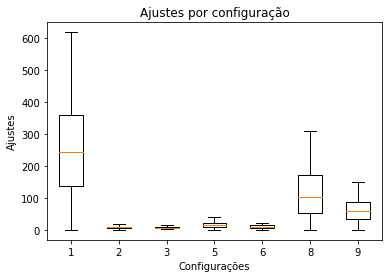

In [79]:
#Boxplot para as épocas sem as configurações 4 e 7
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.boxplot([c1e, c2e, c3e, c5e, c6e, c8e, c9e], showfliers=False, 
            labels = ['1','2','3','5','6','8','9'])

ax1.set_title('Épocas por configuração')
ax1.set_xlabel('Configurações')
ax1.set_ylabel('Épocas')
plt.show()


#Boxplot para os ajustes sem as configurações 4 e 7
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.boxplot([c1a, c2a, c3a, c5a, c6a, c8a, c9a], showfliers=False,
            labels = ['1','2','3','5','6','8','9'])

ax2.set_title('Ajustes por configuração')
ax2.set_xlabel('Configurações')
ax2.set_ylabel('Ajustes')

plt.show()

#### Bloxplot com as configurações 2, 3, 5 e 6

<div style="text-align: justify">Por fim, o boxplot das configurações 2, 3, 5 e 6, foi uma tentativa de averiguar diferenças significativas entre essas configurações. No gráfico de épocas por configuração não foi possível notar, porém no gráfico de ajustes, vemos uma pequena desvantagem para as configurações 5 e 6, as quais precisaram de ajustes a mais do que suas concorrentes. Em comum as configurações 5 e 6 utilizam uma taxa de aprendizagem de 0.1, enquanto que as duas melhores configurações a 2 e a 3 usam 0.4. 
</div>

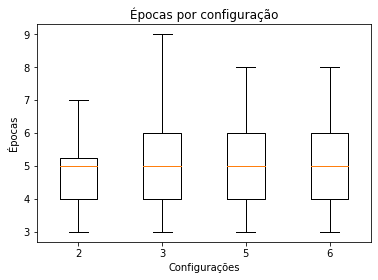

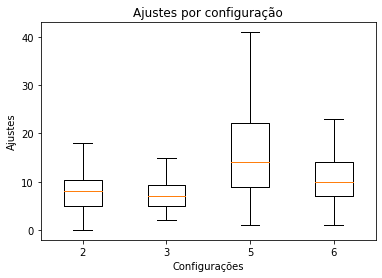

In [81]:
#Boxplot para as epocas das configurações 2, 3, 5 e 6
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.boxplot([c2e, c3e, c5e, c6e], showfliers=False, 
            labels = ['2','3','5','6'])

ax1.set_title('Épocas por configuração')
ax1.set_xlabel('Configurações')
ax1.set_ylabel('Épocas')
plt.show()

#Boxplot para os ajustes das configurações 2, 3, 5 e 6
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.boxplot([c2a, c3a, c5a, c6a], showfliers=False,
            labels = ['2','3','5','6'])

ax2.set_title('Ajustes por configuração')
ax2.set_xlabel('Configurações')
ax2.set_ylabel('Ajustes')

plt.show()

<div style="text-align: justify">Os experimentos e os resultados apresentados nas tabelas e nos gráficos, demonstram que as melhores performance foram obtidas ao se utilizar uma taxa de aprendizagem entre 0.1 e 0.4 e pesos entre (-1,+1) e (-0.5, +0.5). Intervalos de pesos muito grandes e taxas de aprendizagem muito baixas levam o algoritmo do Perceptron de Rosenblatt a precisar de mais épocas e consequentemente mais ajustes para obter o vetor peso solução de um problema linearmente separável.
</div>